<a href="https://colab.research.google.com/github/knirpsgraph/ada_portoSeguro/blob/main/notebooks/01_EDA_integrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.datasets import fetch_openml

from src.data_loader import load_and_save_data
from src import theme

try:
    import missingno as msno
    MISSINGNO_AVAILABLE = True
except ImportError:
    MISSINGNO_AVAILABLE = False

theme.set_project_theme()

# Globale Variablen für 'missingno'
FIGSIZE_MISSINGNO = (20, 8)
FONTSIZE_MISSINGNO = 14

f"Pandas version: {pd.__version__}"

'Pandas version: 2.3.1'

# Porto Seguro´s Safe Driver Prediction
Download URL and Informationen über Daten: www.openml.org/search?type=data&status=active&id=42742
Informationen über den Datensatz aus einer Kaggel Competition im Jahr 2017: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction


## Download

In [7]:
print("Die Daten werden geladen")
df=load_and_save_data()

Die Daten werden geladen
Lade Datensatz lokal...
Datensatz erfolgreich geladen


In [8]:
print("Überblick über den Datensatz")
print(df.head())
print("\nDimensionen des Datensatzes:", df.shape)
df.info()

Überblick über den Datensatz
   target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0       0        2.0            2.0        5.0            1.0            0.0   
1       0        1.0            1.0        7.0            0.0            0.0   
2       0        5.0            4.0        9.0            1.0            0.0   
3       0        0.0            1.0        2.0            0.0            0.0   
4       0        0.0            2.0        0.0            1.0            0.0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              1              0  ...   
2              0              0              1              0  ...   
3              1              0              0              0  ...   
4              1              0              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \


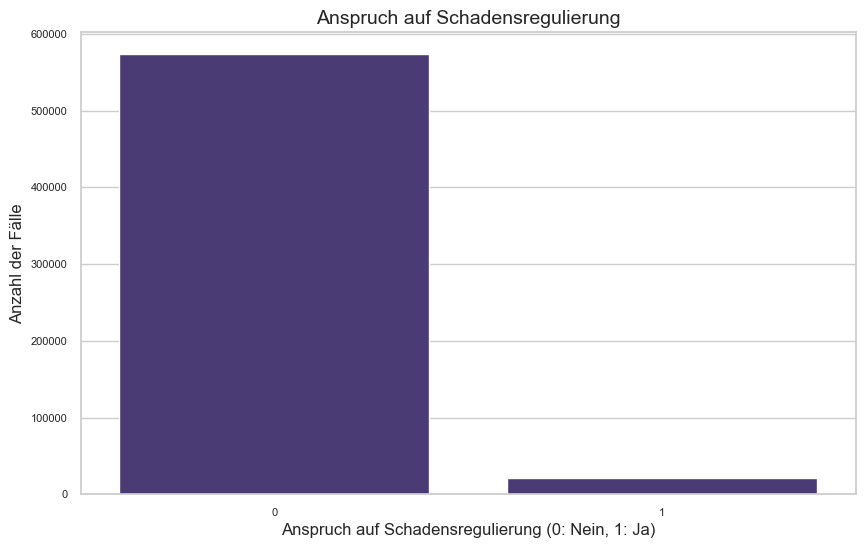


Anzahl der Fälle pro Klasse:
target
0    573518
1     21694
Name: count, dtype: int64
Prozentsatz der Fälle mit Anspruch: 3.64%


In [10]:
plt.figure(figsize=theme.FIGSIZE_SMALL)
sns.countplot(x='target', data=df)

plt.title('Anspruch auf Schadensregulierung')
plt.xlabel('Anspruch auf Schadensregulierung (0: Nein, 1: Ja)')
plt.ylabel('Anzahl der Fälle')
plt.show()

target_counts = df['target'].value_counts()
print("\nAnzahl der Fälle pro Klasse:")
print(target_counts)
print(f"Prozentsatz der Fälle mit Anspruch: {target_counts[1] / len(df) * 100:.2f}%")


## Explorative Data Analysis (EDA)
### Task
Predict whether a driver will initiate an auto insurance claim in the next year.

### Information about Data
- missing values are coded with -1
- 595212 cases
- 58 features

### Missing Values


Visualisierung der fehlenden Daten als Matrix (Muster):


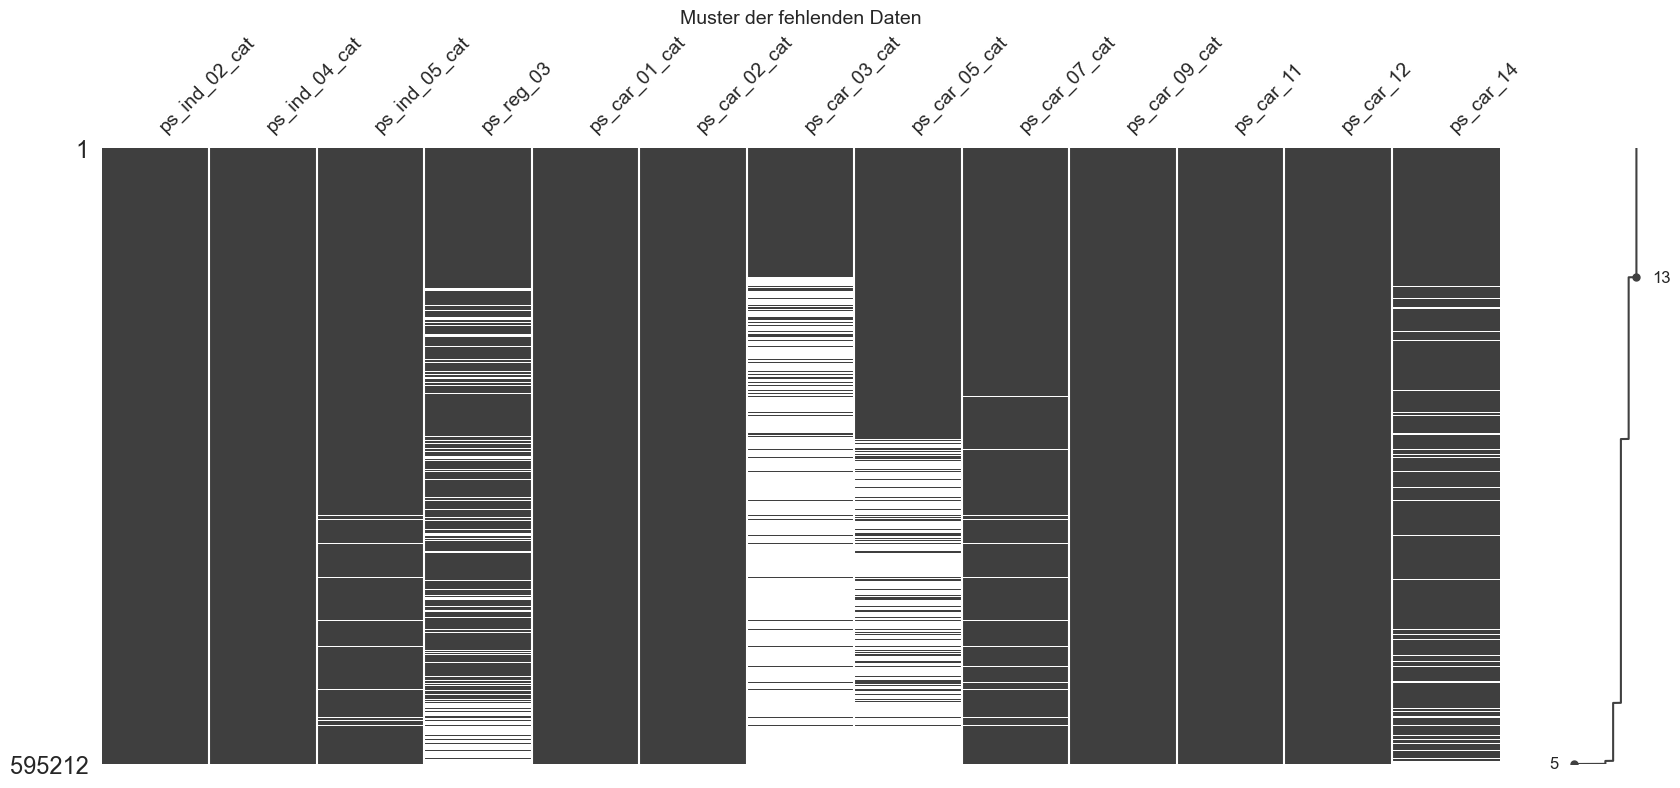

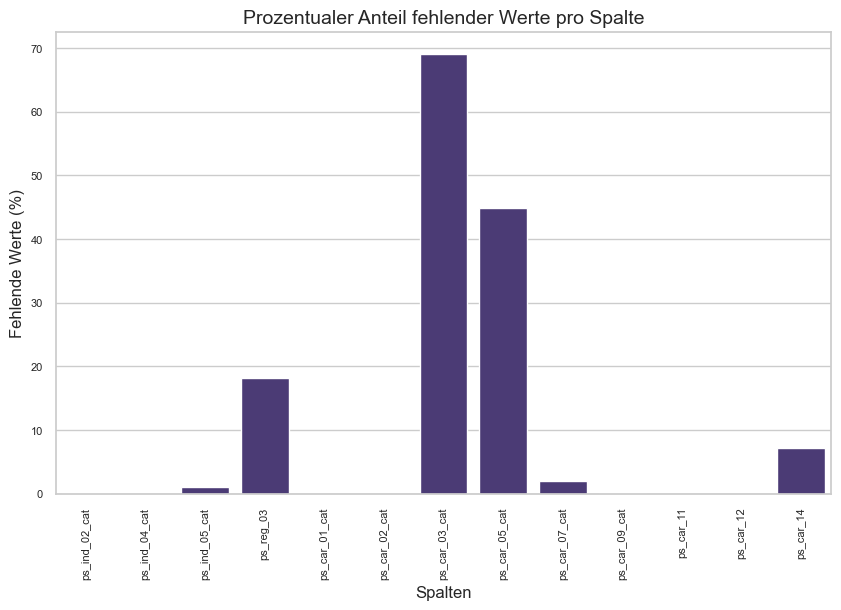

In [18]:
   if MISSINGNO_AVAILABLE:
        print("\nVisualisierung der fehlenden Daten als Matrix (Muster):")
        missing_value_columns = df.columns[df.isnull().any()].tolist()
        df_missing = df[missing_value_columns]
        sorted_data = msno.nullity_sort(df_missing, sort='descending')
        msno.matrix(sorted_data, figsize=FIGSIZE_MISSINGNO, fontsize=FONTSIZE_MISSINGNO, color=(0.25, 0.25, 0.25))
        plt.title('Muster der fehlenden Daten', fontsize=theme.TITLE_FONTSIZE)
        plt.show()

   missing_values_total = df.isnull().sum()
   missing_values_percentage = (missing_values_total[missing_values_total > 0] / len(df)) * 100
   if not missing_values_percentage.empty:
        plt.figure(figsize=theme.FIGSIZE_SMALL)
        sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values)
        plt.xticks(rotation=90)
        plt.title('Prozentualer Anteil fehlender Werte pro Spalte', fontsize=theme.TITLE_FONTSIZE)
        plt.xlabel('Spalten', fontsize=theme.LABEL_FONTSIZE)
        plt.ylabel('Fehlende Werte (%)', fontsize=theme.LABEL_FONTSIZE)
        plt.show()


In [21]:
# Analyse und Visualisierung der Features
cat_features_all = [col for col in df.columns if '_cat' in col or '_bin' in col]
cont_features = [col for col in df.columns if '_cat' not in col and '_bin' not in col and col != 'target']

cat_cardinality = df[cat_features_all].nunique().sort_values()

# Wähle die Top 5 Features mit der geringsten Anzahl an Kategorien als Beispiele aus
example_cat_features = cat_cardinality.head(5).index.tolist()


print(f"Es wurden {len(cat_features_all)} kategoriale/binäre und {len(cont_features)} kontinuierliche Features gefunden.")
print(f"Dynamisch ausgewählte Beispiele für die Visualisierung: {example_cat_features}")

Es wurden 31 kategoriale/binäre und 26 kontinuierliche Features gefunden.
Dynamisch ausgewählte Beispiele für die Visualisierung: ['ps_car_02_cat', 'ps_calc_18_bin', 'ps_calc_17_bin', 'ps_calc_16_bin', 'ps_calc_15_bin']



Visualisierung der Verteilung ausgewählter kategorialer Features:


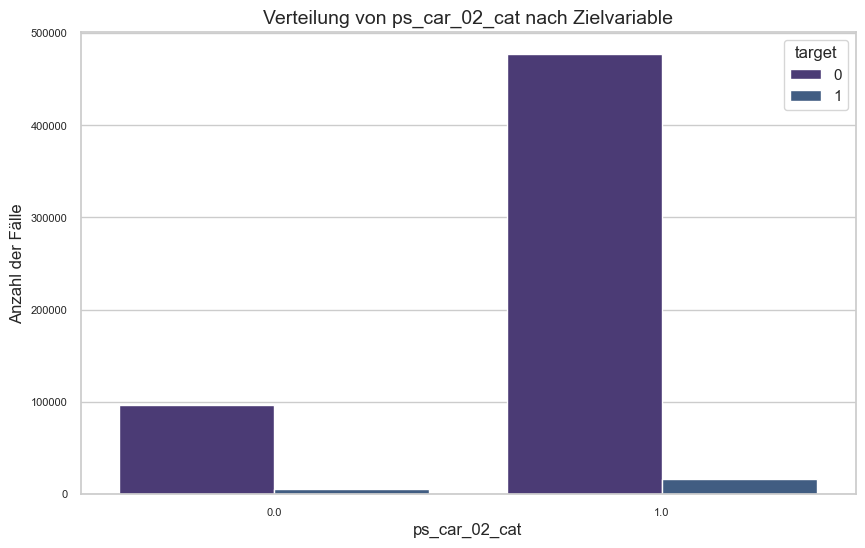

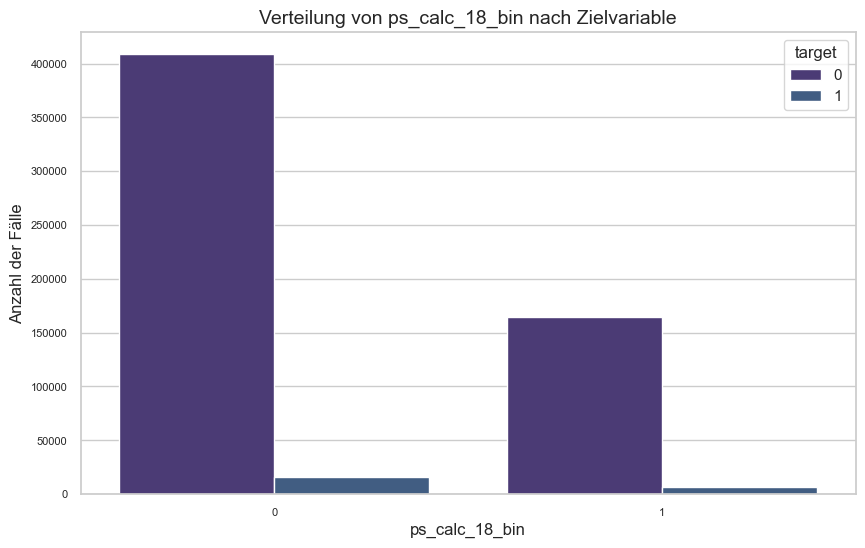

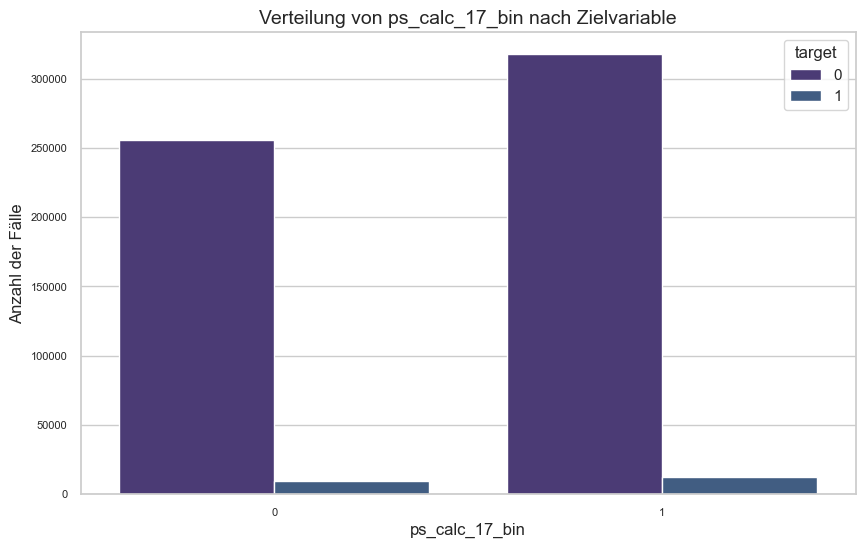

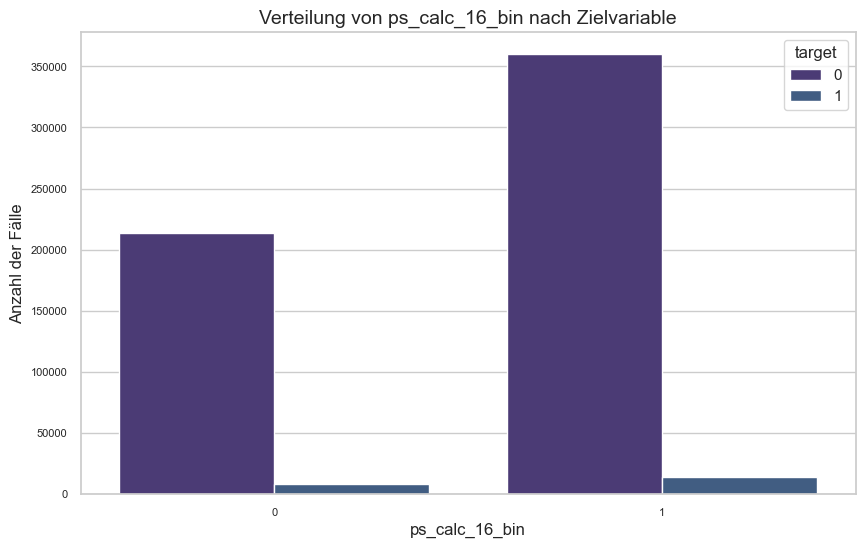

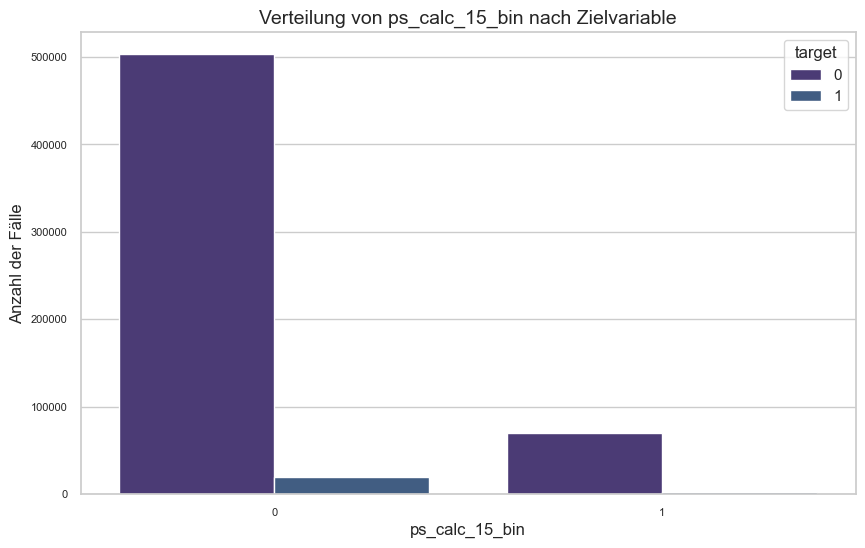


Visualisierung der Verteilung ausgewählter kontinuierlicher Features:


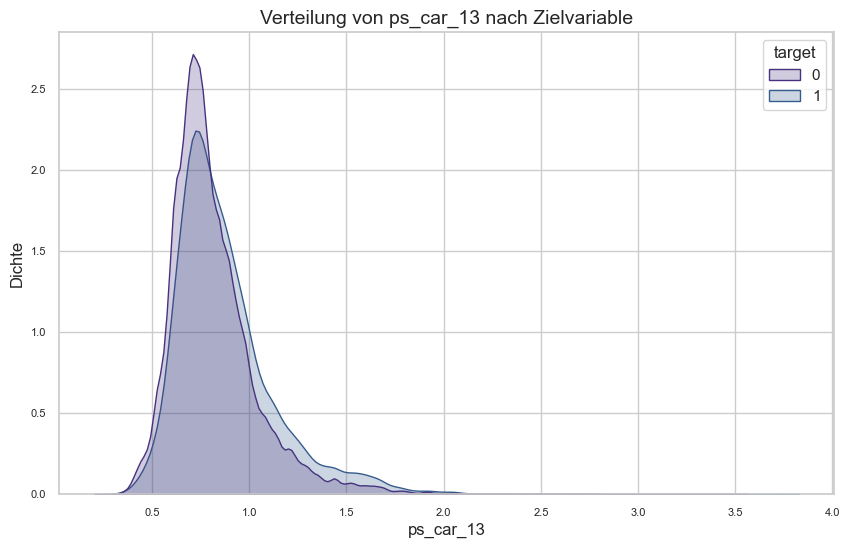

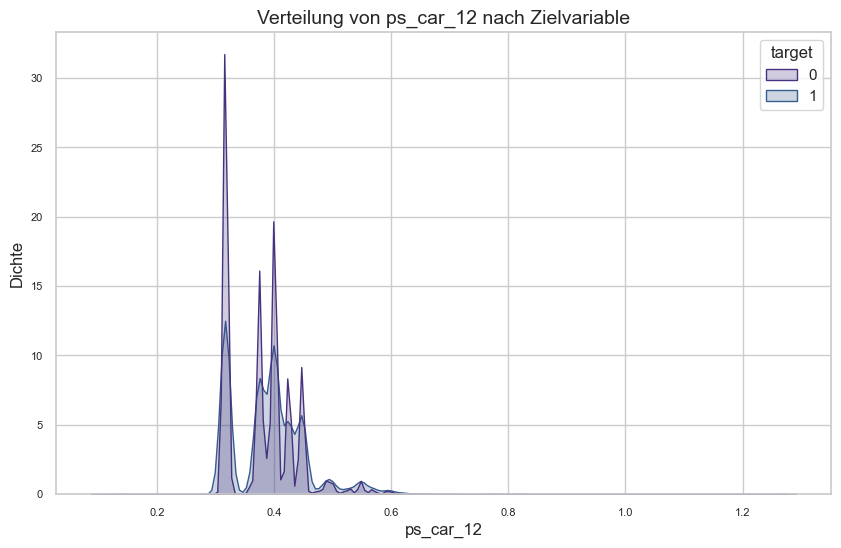

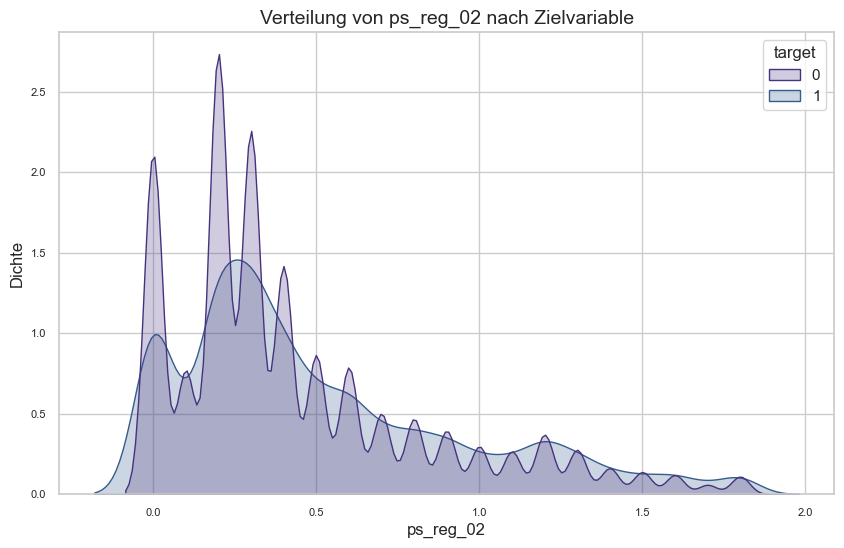

In [24]:
print("\nVisualisierung der Verteilung ausgewählter kategorialer Features:")
for col in example_cat_features:
    if col in df.columns:
        plt.figure(figsize=theme.FIGSIZE_SMALL)
        sns.countplot(x=col, hue='target', data=df)
        plt.title(f'Verteilung von {col} nach Zielvariable')
        plt.xlabel(col)
        plt.ylabel('Anzahl der Fälle')
        plt.show()

correlation_with_target = df[cont_features].corrwith(df['target']).sort_values(key=abs, ascending=False)
example_cont_features = correlation_with_target.head(3).index.tolist()

print("\nVisualisierung der Verteilung ausgewählter kontinuierlicher Features:")
for col in example_cont_features:
    if col in df.columns:
        plt.figure(figsize=theme.FIGSIZE_SMALL)
        sns.kdeplot(data=df, x=col, hue='target', fill=True, common_norm=False)
        plt.title(f'Verteilung von {col} nach Zielvariable')
        plt.xlabel(col)
        plt.ylabel('Dichte')
        plt.show()

In [ ]:
import missingno as msno

missing_value_columns = df.columns[df.isnull().any()].tolist()
df_missing = df[missing_value_columns]

msno.bar(df_missing,
         figsize=theme.FIGSIZE_SMALL,
         labels=True)
plt.title('Visualisierung fehlender Daten', fontsize=theme.TITLE_FONTSIZE)
plt.show()

plt.figure(figsize=theme.FIGSIZE_SMALL)
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values)
plt.xticks(rotation=90)
plt.title('Prozentualer Anteil fehlender Werte pro Spalte', fontsize=theme.TITLE_FONTSIZE)
plt.xlabel('Spalten', fontsize=theme.LABEL_FONTSIZE)
plt.ylabel('Fehlende Werte (%)', fontsize=theme.LABEL_FONTSIZE)
plt.show()

#### Observations
for ps_car_03_cat a critical number of values are missing (69%). Also ps_car_05_cat has almos 45% missing. These variables should be interpreted with caution.

In [ ]:
# correlation of Missing Values
msno.heatmap(df_missing,figsize=theme.FIGSIZE_SMALL)
plt.show()

#### Observations
ps_car_01_cat and ps_ind_04_cat show a very high correlation of missing values, meaning that if one value is missing in a case the other one will probably also be missing.
High correlation (>= 0.5) are also seen in the following pairs:
ps_car_09_cat & ps_ind_05_cat
ps_ind_04_cat & ps_ind_02_cat
ps_car_05_cat & ps_car_03_cat
ps_car_01_cat & ps_ind_02_cat



In [ ]:
# Verteilung der Spalten von fehlenden Werten
sorted_data = msno.nullity_sort(df_missing, sort='descending')
msno.matrix(sorted_data, figsize=(20,8), fontsize=14, color=(0.25, 0.25, 0.25));

#### observations
in all the dataset one case does not have more than 8 missing values in total.

### Numerical datatypes

In [ ]:
# define numeric variables
numeric_columns = df.select_dtypes(include="number").columns

df[numeric_columns].agg(["min","max","mean","median"])


#### Observations
ps_ind_14: Median is 0 and mean is almost 0 too
ps_car_11: median equlas the maximum
-> these variables probably show littlte information

For some variables the mean and the median are very close to the maximum or minimum (for example ps_ind_01; ps_reg_03; ps_car_15; ps_calc_05)

In [ ]:
# visualization
fig, axes = plt.subplots(26, 1, figsize = (8,52))

for ax, name in zip(axes, numeric_columns):
    df[name].plot.kde(ax=ax, legend=True)

#### observations
ps_ind_14: all data are seem to be 0
ps_calc_01: data are distributed evenly
ps_calc_02: data are distributed evenly
ps_calc_03: data are distributed evenly
-> seem to carry very little information


In [ ]:
# a closer look on those variables
df['ps_ind_14'].value_counts()

In [ ]:
# a closer look on those variables:
columns = ['ps_calc_01','ps_calc_02', 'ps_calc_03']

vc_table = pd.concat(
    [df[col].value_counts().rename(col) for col in columns],
    axis=1
)

vc_table.fillna(0).astype(int)

In [ ]:
# interaction with target variable
fig, axes = plt.subplots(13, 2, figsize=(10, 52))

for ax, name in zip(axes.ravel(), numeric_columns):
    sns.violinplot(df, x=name, hue="claims", ax=ax)


#### Observations
All variables don´t seem to differ very good between drivers who filed a claim and those who didn´t. Especially for the calc-variables the distributions show very little or no differences at all.

In [ ]:
# visualize the correlation
sns.heatmap(df.select_dtypes("number").corr(), cmap="viridis")

#### Observations
All variables with calc seem to have no interactions with the other numerical varaibles. This may be the reason they got excluded from the models in kaggle.

In [ ]:
filtered_df = df.select_dtypes("number").loc[:, df.select_dtypes("number").columns.str.contains("calc")]
sns.heatmap(filtered_df.corr(), cmap="viridis", annot=True,fmt=".2f")

the correlation matrix shows, that the correlation of all the calc variables are at least near 0.

In [ ]:
# all variables without calc
filtered_df = df.select_dtypes("number").loc[:, ~df.select_dtypes("number").columns.str.contains("calc")]
sns.heatmap(filtered_df.corr(), cmap="viridis", annot=True,fmt=".2f")

#### observations
some of the variables show high correlations, while most of them have little interactions.
ps_reg_02 & ps_reg_03 and ps_car_12 & ps_car_13 seem to have the highest correlations.

### Categorical variables

(
  df.select_dtypes("object")
  .drop(columns=["claims"])
  .apply(lambda s: s.value_counts().shape[0])
  .sort_values()
  .plot.barh(xlabel = "number of categories")
)

In [ ]:
# number of Categories
(
  df.select_dtypes("category")
  .drop(columns=["claims"])
  .apply(lambda s: s.value_counts().shape[0])
  .sort_values()
  .plot.barh(xlabel = "number of categories")
)

The first 8 variables have more than two variables all the other seem to be dichotom. The variable "ps_car_11-cat" has a lot more categories than the others.

In [ ]:
# distribution of traget variable
plt.figure(figsize=(15,8))

ax = sns.countplot(x = 'claims', data=df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df['claims'])),
                (p.get_x() + 0.3, p.get_height() + 10000))

only 3.7 % of the drivers filed a claim, that makes it very difficult to predict the probability.

In [ ]:
# categories of the variable with many categories
df["ps_car_11_cat"].value_counts()

There are 104 categories for this variable but all seem to be filled with at least 1100 cases.

In [ ]:
# Values count of all categorical variables
categorical_columns = df.select_dtypes(include="category").drop(columns=["claims"]).columns

fig, axes = plt.subplots(11, 3, figsize=(15, 22), layout="constrained")

for ax, colname in zip(axes.flat, categorical_columns):
    (
        df[colname]
        .value_counts(dropna = False)
        .plot.barh(ax=ax, title=colname)
    )

#### Observations
In most of the dichotom variables one of the categories holds a large part of all the data.


In [ ]:
# proportions for all binary variables
binary_columns = [
    col for col in df.columns
    if df[col].nunique(dropna=True) == 2
]

rel_freq_table = pd.DataFrame({
    col: df[col].value_counts(normalize=True, dropna = False)
    for col in binary_columns
}).T

rel_freq_table

#### observations:
ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin have more than 99% of the cases in one category.

In [ ]:
# interaction of binary categories with target variable
fig, axes = plt.subplots(8, 3, figsize=(15, 22), layout="constrained")

for ax, colname in zip(axes.flat, binary_columns):
    (
        pd.crosstab(
            index=df[colname],
            columns=df["claims"]
        )
        .pipe(lambda df_: df_.div(df_.sum(axis = "columns"), axis = "rows"))
        .plot.barh(stacked=True, title=colname, ax=ax)
    )

In [ ]:
# interactions wit ordinal variables and target
ordinal_columns = ["ps_car_01_cat", "ps_car_04_cat", "ps_car_06_cat",
                             "ps_car_09_cat", "ps_car_10_cat",
                             "ps_ind_05_cat", "ps_ind_02_cat"]
fig, axes = plt.subplots(7,1, figsize=(10, 21), layout="constrained")

for ax, colname in zip(axes.flat, ordinal_columns):
    (
        pd.crosstab(
            index=df[colname],
            columns=df["claims"]
        )
        .pipe(lambda df_: df_.div(df_.sum(axis = "columns"), axis = "rows"))
        .plot.barh(stacked=True, title=colname, ax=ax)
    )

In [ ]:
# extra plot for ps_car_11_cat
(
    pd.crosstab(index = df["ps_car_11_cat"], columns = df["claims"])
    .pipe(lambda df_: df_.div(df_.sum(axis = "columns"), axis = "rows"))
    .plot.barh(stacked=True, title="ps_car_11_cat", figsize=(10, 21))
)



#### observations
no major hints can be observed from this graphs. Somm of the Variables show little differences between the two target-categories, but ome categories seem to show no diffrence at all: ps_ind_09_bin, ps_ind_18_bin, ps_car_05_cat, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin.

In [ ]:
# a closer look on those variables:
columns = ["ps_ind_09_bin", "ps_ind_18_bin", "ps_car_05_cat",
           "ps_calc_16_bin", "ps_calc_17_bin", "ps_calc_18_bin",
           "ps_calc_19_bin", "ps_calc_20_bin"]

for col in columns:
    print(f"\nCrosstab für: {col} vs. target")
    display(pd.crosstab(df[col], df["claims"], margins=True, normalize='index').round(2))